# Relationship Between On-Line Media Sentiment, Language Usage, and Cryptocurrency Market Capitalization 


# MA5832 Assessment 3
# Matthew Moore
# Jc626851
# 1379701

# Introduction

# Literature Review

# Why this NLP Task

# Data Pre processing

# Algorithm Design and Function

# Hyper Parameter Selection

# Preliminary Assessment of NLP Task Performance

In [30]:
#################################################
##  Crypto Currency Media Analysis for Relationship
##  Between language and sentiment of references

import re
import numpy as np
import pandas as pd

##################################################
##  Load scraped Corpus from disc

expanded_corpus = pd.read_csv("expanded_corpus.csv")

In [31]:
#############################################
##  Parse Documents into sngle sentenses


import nltk
nltk.download('punkt')


# Create a data frame to contain corpus of sentence
sentence_corpus = pd.DataFrame(columns=['coin', 'ticker','document_url','sentence'])

def clean_text(text):
    text =  re.sub('[^a-zA-Z\s\',\.]', '', text)
    text =  re.sub('\s+',' ', text)
    return(text)

# Iterate through expanded corpus, extracting sentenses and cleaning the text
for i in range(len(expanded_corpus)):
    # Parse document into sentenses
    sentence_list = nltk.tokenize.sent_tokenize(expanded_corpus.document[i])
    
    #  add sentences to sentence_corpus
    for sentence in sentence_list:
        sentence_corpus.loc[len(sentence_corpus)] = [expanded_corpus.coin[i],
                                                     expanded_corpus.ticker[i],
                                                     expanded_corpus.document_url[i],
                                                     clean_text(sentence)]


sentence_corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,coin,ticker,document_url,sentence
0,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin is a cryptocurrency invented in by an...
1,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,the currency began use in when its implementat...
2,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,"bitcoin is a decentralized digital currency, ..."
3,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,transactions are verified by network nodes thr...
4,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoins are created as a reward for a process...
...,...,...,...,...
42725,cardano,ada,https://iohk.io/en/research/,the new paradigm is decentralization where pee...
42726,cardano,ada,https://iohk.io/en/research/,the research areas that arise from this change...
42727,cardano,ada,https://iohk.io/en/research/,iohk research is headed by professor aggelos k...
42728,cardano,ada,https://iohk.io/en/research/,each team member has the freedom to propose pr...


In [32]:
#############################################
## Perform Sentiment Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Create a Sentiment Intensity Analyser object
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis for extracted sentences
sentiment = sentence_corpus['sentence'].apply(lambda r: sid.polarity_scores(r))
sentiment = pd.DataFrame(list(sentiment))
# Combine sentiment scores with sentence corpus

# Check that the corpus of individuola sentences and
# Sentiment scores are the same length
print(len(sentence_corpus))
print(len(sentiment))

# Concatenate the sentement scores with the sentences being analyised
sentence_corpus =  pd.concat([sentence_corpus,sentiment], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


42730
42730


In [33]:
sentence_corpus

,coin,ticker,document_url,sentence,neg,neu,pos,compound
0,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin is a cryptocurrency invented in by an...,0.0,1.000,0.000,0.0000
1,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,the currency began use in when its implementat...,0.0,1.000,0.000,0.0000
2,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,"bitcoin is a decentralized digital currency, ...",0.0,1.000,0.000,0.0000
3,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,transactions are verified by network nodes thr...,0.0,1.000,0.000,0.0000
4,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoins are created as a reward for a process...,0.0,0.584,0.416,0.6908
...,...,...,...,...,...,...,...,...
42725,cardano,ada,https://iohk.io/en/research/,the new paradigm is decentralization where pee...,0.0,1.000,0.000,0.0000
42726,cardano,ada,https://iohk.io/en/research/,the research areas that arise from this change...,0.0,1.000,0.000,0.0000
42727,cardano,ada,https://iohk.io/en/research/,iohk research is headed by professor aggelos k...,0.0,0.753,0.247,0.8591
42728,cardano,ada,https://iohk.io/en/research/,each team member has the freedom to propose pr...,0.0,0.781,0.219,0.6369


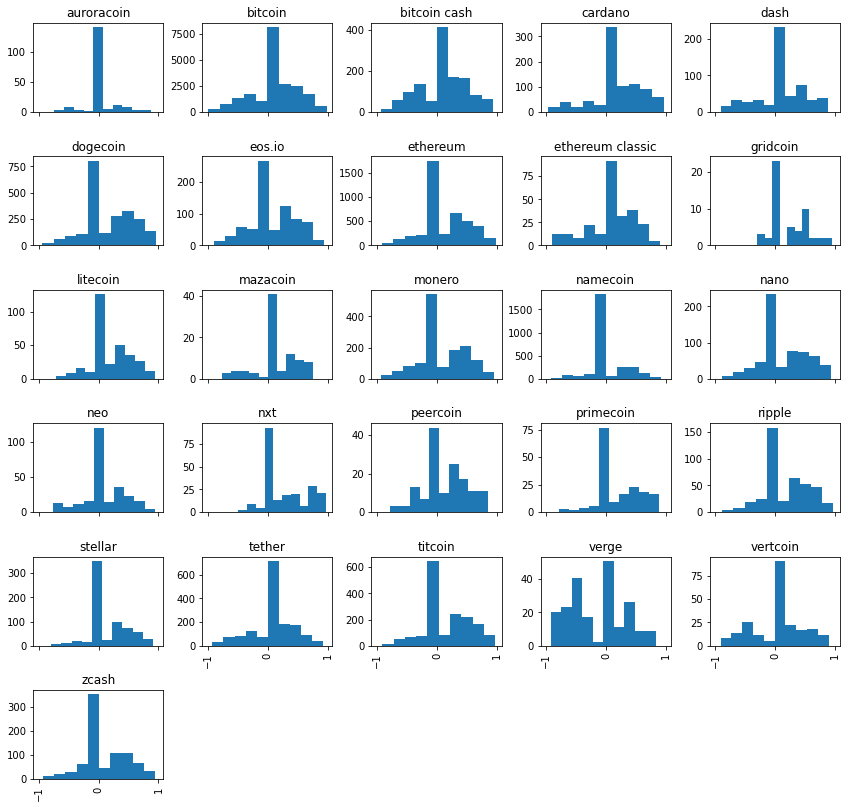

In [34]:
import matplotlib.pyplot as plt

# Display sentiment distrobution for each crypto currency analyised
sentence_corpus.compound.hist(by=sentence_corpus.coin, sharey=False, sharex=True, figsize=(14,14));

In [35]:
# Check the document count for different sentiments
# defining positive as having a score over 0.15
# negative having a score under -0.15
# and all others being neutral

negative_mentions = len(sentence_corpus[sentence_corpus['compound']<=-0.15])
positive_mentions = len(sentence_corpus[sentence_corpus['compound']>=0.15])
neutral_mentions = len(sentence_corpus[(sentence_corpus['compound']<0.15) & (sentence_corpus['compound']>-0.15)])

print("Significantly negative sentence count: " + str(negative_mentions))
print("Significantly positive sentence count: " + str(positive_mentions))
print("Neutral sentence count: " + str(neutral_mentions))

Significantly negative sentence count: 7818
Significantly positive sentence count: 16420
Neutral sentence count: 18492


In [36]:
########################################
## Create functions to:
## Clean sentences (Remove unnecessary punctuation, numbers, formatting)
## Identify named entities and replace them with a common token
## (We're interested in information about crypto currencies, not organisations that deal with them)
## POS Tag and lematize sentences

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')


# replaces named entities with "named_entity"
def remove_named_entities(text):
    parsed = nlp(text)
    output_text=[]
    ents = [e.text for e in parsed.ents]
    for item in parsed:
        if item.text in ents:
            output_text.append("named_entity")
        else:
            output_text.append(item.text)
    return " ".join(output_text)


# Return a lemmatized version of a string
def lemmatize_string(text):
    
    if text is None:
        return ""
   
    if not  isinstance(text, str):
        return ""
    
    lemmatizer = WordNetLemmatizer()

    # tokenise the sentence and determine part of speech tagging
    # for each word
    pos_tagged_text = nltk.pos_tag(nltk.word_tokenize(text))  
    
    # Convert the POS tagging from nltk.pos_tag
    # to the wordnet POS identifier recognised
    # by WordNetLemmatizer()
    words_tagged =[]
    for word in pos_tagged_text:
        if word[1].startswith('J'):
            word=(word[0], wordnet.ADJ)
        elif word[1].startswith('V'):
            word=(word[0], wordnet.VERB)
        elif word[1].startswith('N'):
            word=(word[0], wordnet.NOUN)
        elif word[1].startswith('R'):
            word=(word[0], wordnet.ADV)
        else:
            word=(word[0], None)
        words_tagged.append(word)
    
    # Lemmatize each word according to it's determined word class
    lemmatized = []
    for word, tag in words_tagged:
        if tag is None:
            lemmatized.append(word)
        else:        
            lemmatized.append(lemmatizer.lemmatize(word, tag))
    
    # reconstruct and returne lemmatized sentence
    seperator = ' '
    return seperator.join(lemmatized)

# remove everything that isn't text
# and remove 1 and 2 letter words
def scrub_text(text):
    # Remove numbers
    text =  re.sub('(?<=\s)\d+(?=\s)', '', text)
    # remove single and double character terms
    text = re.sub("(?<=\s)\w{1,2}(?=\s)", "", text)
    # remove non word characers except for spaces
    text =  re.sub('[^\w\s]',' ', text)
    # condence multple spaces
    text =  re.sub('\s+',' ', text)
    return(text)
    
print (sentence_corpus.sentence[1])
print(scrub_text(lemmatize_string(remove_named_entities(sentence_corpus.sentence[1]))))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


the currency began use in when its implementation was released as opensource software.ch.
the currency begin use when its implementation release opensource software ch 


In [37]:
########################################
## Clean sentences (Remove unnecessary punctuation, numbers, formatting)
## Identify named entities and replace them with a common token
## (We're interested in information about crypto currencies, not organisations that deal with them)
## POS Tag and lematize sentences
## Collect sentences into 3 documents for eah crypto, positive, negative and neutral


cleaned_sentence_corpus = sentence_corpus.copy(deep=True)

for i in range(len(cleaned_sentence_corpus)):
    cleaned_sentence_corpus.sentence[i] = remove_named_entities(cleaned_sentence_corpus.sentence[i])
    cleaned_sentence_corpus.sentence[i] = lemmatize_string(cleaned_sentence_corpus.sentence[i])
    cleaned_sentence_corpus.sentence[i] = scrub_text(cleaned_sentence_corpus.sentence[i])
    
cleaned_sentence_corpus

<ipython-input-37-50198f9fa8c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sentence_corpus.sentence[i] = remove_named_entities(cleaned_sentence_corpus.sentence[i])
<ipython-input-37-50198f9fa8c9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sentence_corpus.sentence[i] = lemmatize_string(cleaned_sentence_corpus.sentence[i])
<ipython-input-37-50198f9fa8c9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clea

,coin,ticker,document_url,sentence,neg,neu,pos,compound
0,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin cryptocurrency invent unknown person g...,0.0,1.000,0.000,0.0000
1,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,the currency begin use when its implementation...,0.0,1.000,0.000,0.0000
2,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin decentralized digital currency without...,0.0,1.000,0.000,0.0000
3,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,transaction verify network node through crypto...,0.0,1.000,0.000,0.0000
4,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoins create reward for process know mining,0.0,0.584,0.416,0.6908
...,...,...,...,...,...,...,...,...
42725,cardano,ada,https://iohk.io/en/research/,the new paradigm decentralization where peerto...,0.0,1.000,0.000,0.0000
42726,cardano,ada,https://iohk.io/en/research/,the research area that arise from this change ...,0.0,1.000,0.000,0.0000
42727,cardano,ada,https://iohk.io/en/research/,iohk research head professor aggelos kiayias c...,0.0,0.753,0.247,0.8591
42728,cardano,ada,https://iohk.io/en/research/,each team member have the freedom propose proj...,0.0,0.781,0.219,0.6369


In [38]:
cleaned_sentence_corpus.to_csv ('cleaned_sentence_corpus.csv', index = None, header=True)

In [39]:
#####################################
##  Load Coin Market Capitalisations

coin_market_caps = pd.read_csv("coin_market_caps.csv")

In [40]:
#######################################################################################################################
# Check that the coin_market_caps
# Dataframe has been populated
# There will be duplicates, and the first
# Entry will contain the correct market capitalisation

coin_market_caps.head(5)

,symbol,marketcap
0,NaN,NaN
1,btc,9.425424e+11
2,eth,2.596691e+11
3,bnb,7.605089e+10
4,usdt,NaN


In [41]:
##############################
### Add the market cap figures to
### The sentence corpus for final analysis

final_sentence_corpus = cleaned_sentence_corpus.copy(deep=True)

# Add market cap column to the dataframe
final_sentence_corpus.insert(len(final_sentence_corpus.columns), "market_cap","", allow_duplicates=True)

# Each entry in the data frame, use the ticker symbol
# to find the current market cap for the currency
# mentioned in each row
for i in range(len(final_sentence_corpus)):
    if final_sentence_corpus.ticker[i] in list(coin_market_caps.symbol):
        cap = list(coin_market_caps.marketcap[coin_market_caps['symbol']==final_sentence_corpus.ticker[i]])[0]
    else:
        cap="No Data"
    final_sentence_corpus.market_cap[i]=cap

final_sentence_corpus.to_csv ('final_sentence_corpus.csv', index = None, header=True)

final_sentence_corpus

<ipython-input-41-c2f4fea72ea8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentence_corpus.market_cap[i]=cap


,coin,ticker,document_url,sentence,neg,neu,pos,compound,market_cap
0,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin cryptocurrency invent unknown person g...,0.0,1.000,0.000,0.0000,9.42542e+11
1,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,the currency begin use when its implementation...,0.0,1.000,0.000,0.0000,9.42542e+11
2,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoin decentralized digital currency without...,0.0,1.000,0.000,0.0000,9.42542e+11
3,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,transaction verify network node through crypto...,0.0,1.000,0.000,0.0000,9.42542e+11
4,bitcoin,btc,https://en.wikipedia.org//wiki/Bitcoin,bitcoins create reward for process know mining,0.0,0.584,0.416,0.6908,9.42542e+11
...,...,...,...,...,...,...,...,...,...
42725,cardano,ada,https://iohk.io/en/research/,the new paradigm decentralization where peerto...,0.0,1.000,0.000,0.0000,3.57699e+10
42726,cardano,ada,https://iohk.io/en/research/,the research area that arise from this change ...,0.0,1.000,0.000,0.0000,3.57699e+10
42727,cardano,ada,https://iohk.io/en/research/,iohk research head professor aggelos kiayias c...,0.0,0.753,0.247,0.8591,3.57699e+10
42728,cardano,ada,https://iohk.io/en/research/,each team member have the freedom propose proj...,0.0,0.781,0.219,0.6369,3.57699e+10


In [42]:
# Create dataframe containing a list of in-scope cyrpto currencies and their ticker symbols

cryptos = final_sentence_corpus.copy(deep=True)

cryptos = cryptos.groupby(['coin','ticker']).size().reset_index()

cryptos = cryptos.rename(columns={0:'count', 'ticker':'Symbol', 'coin':'Currency'})

cryptos.head(3)

,Currency,Symbol,count
0,auroracoin,aur,189
1,bitcoin,btc,20663
2,bitcoin cash,bch,1263


In [43]:
####################################################################
## Vectorize corpus for use in classification and regression tree models
## After segmenting the dataset based on document sentment

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# Remove any row that couldn't be matched to a market capitalisation
final_sentence_corpus = final_sentence_corpus[final_sentence_corpus['market_cap']!="No Data"]
final_sentence_corpus["market_cap"] = pd.to_numeric(final_sentence_corpus["market_cap"])
final_sentence_corpus = final_sentence_corpus.dropna()



# Add crypto names and tickers to stopwords
stopwords = nltk.corpus.stopwords.words('english')
for i in range(len(cryptos)): 
    stopwords.append(cryptos.Currency[i])
    stopwords.append(cryptos.Symbol[i])
stopwords.append("bitcoins")
stopwords.append("named_entity")

# Additional stop words discovered after first round of analysis
stopwords = stopwords +['nakamoto', 'palmer','gox','andresen','ether','die','po',
 'dx', 'finney','mt','contract','buterin',  'cash', 'meme','eip', 'classic', 'io' ]

# Additional stopwords discovered after second round of analysis
stopwords = stopwords + ['dogecoins', 'satoshi', 'also', 'der', 'might', 'call', 'say', 'qd', 'run', 'hoskinson', 'coinbase',
'lubin', 'dao', 'dogewallet','name', 'sc', 'mu',  'ud', ]

# Additional stopwords discovered after third round of analysis
stopwords = stopwords +  ['ist', 'caldwell', 'write' , 'raise', 'iohk','dog','recently',  'griffith' , 'markus', 'vitalik' ]

# Use Count Vectorizer to create vector from metadata_soup field
vectorizer_neg = CountVectorizer( max_features=1000, stop_words=stopwords, binary=True)
vectorizer_neu = CountVectorizer( max_features=1000, stop_words=stopwords, binary=True)
vectorizer_pos = CountVectorizer( max_features=1000, stop_words=stopwords, binary=True)

#########################################
##  Get binary count vectors, and corosponding
##  Coin market caps and names
vec_neg = vectorizer_neg.fit_transform(final_sentence_corpus.sentence[final_sentence_corpus['compound']<-0.15].tolist())
market_cap_list_neg = final_sentence_corpus.market_cap[final_sentence_corpus['compound']<-0.15].tolist()
coin_list_neg = final_sentence_corpus.coin[final_sentence_corpus['compound']<-0.15].tolist()

vec_neu = vectorizer_neu.fit_transform(final_sentence_corpus.sentence[(final_sentence_corpus['compound']>=-0.15) & (final_sentence_corpus['compound']<=0.15)].tolist())
market_cap_list_neu = final_sentence_corpus.market_cap[(final_sentence_corpus['compound']>=-0.15) & (final_sentence_corpus['compound']<=0.15)].tolist()
coin_list_neu = final_sentence_corpus.coin[(final_sentence_corpus['compound']>=-0.15) & (final_sentence_corpus['compound']<=0.15)].tolist()

vec_pos = vectorizer_pos.fit_transform(final_sentence_corpus.sentence[final_sentence_corpus['compound']>-0.15].tolist())
market_cap_list_pos = final_sentence_corpus.market_cap[final_sentence_corpus['compound']>-0.15].tolist()
coin_list_pos = final_sentence_corpus.coin[final_sentence_corpus['compound']>-0.15].tolist()




<ipython-input-43-38ca58dade90>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_sentence_corpus["market_cap"] = pd.to_numeric(final_sentence_corpus["market_cap"])


In [44]:
#######################################
## Fit decision tree regressors to investigate relationship between
## Language, sentiment, and market cap
## Fit decission tree classifiers to investigate relatinshop between
## Language sentiment and individual cryptocurrencies

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
import pickle




##########################################
## Fit random forrest regressers to predict
## Market cap based on word occurance
## In a sentiment grouped corpus

dt_neg = DecisionTreeRegressor(max_depth=15, random_state=1234)
dt_neg.fit(vec_neg, market_cap_list_neg)

dt_pos = DecisionTreeRegressor(max_depth=15, random_state=1234)
dt_pos.fit(vec_pos, market_cap_list_pos)

dt_neu = DecisionTreeRegressor(max_depth=15, random_state=1234)
dt_neu.fit(vec_neu, market_cap_list_neu)

##########################################
## Fit random forrest classifiers to predict
## Crypto currency name based on word occurance
## In a sentiment grouped corpus

dt_class_neg = DecisionTreeClassifier(max_depth=15, random_state=1234)
dt_class_neg.fit(vec_neg, coin_list_neg)

dt_class_pos = DecisionTreeClassifier(max_depth=15, random_state=1234)
dt_class_pos.fit(vec_pos, coin_list_pos)

dt_class_neu = DecisionTreeClassifier(max_depth=15, random_state=1234)
dt_class_neu.fit(vec_neu, coin_list_neu)


pickle.dump(dt_neg, open("negative_comment_regression", 'wb'))
pickle.dump(dt_pos, open("positive_comment_regression", 'wb'))
pickle.dump(dt_neu, open("neutral_comment_regression", 'wb'))
pickle.dump(dt_class_neg, open("negative_comment_classification", 'wb'))
pickle.dump(dt_class_pos, open("positive_comment_classification", 'wb'))
pickle.dump(dt_class_neu, open("neutral_comment_classification", 'wb'))


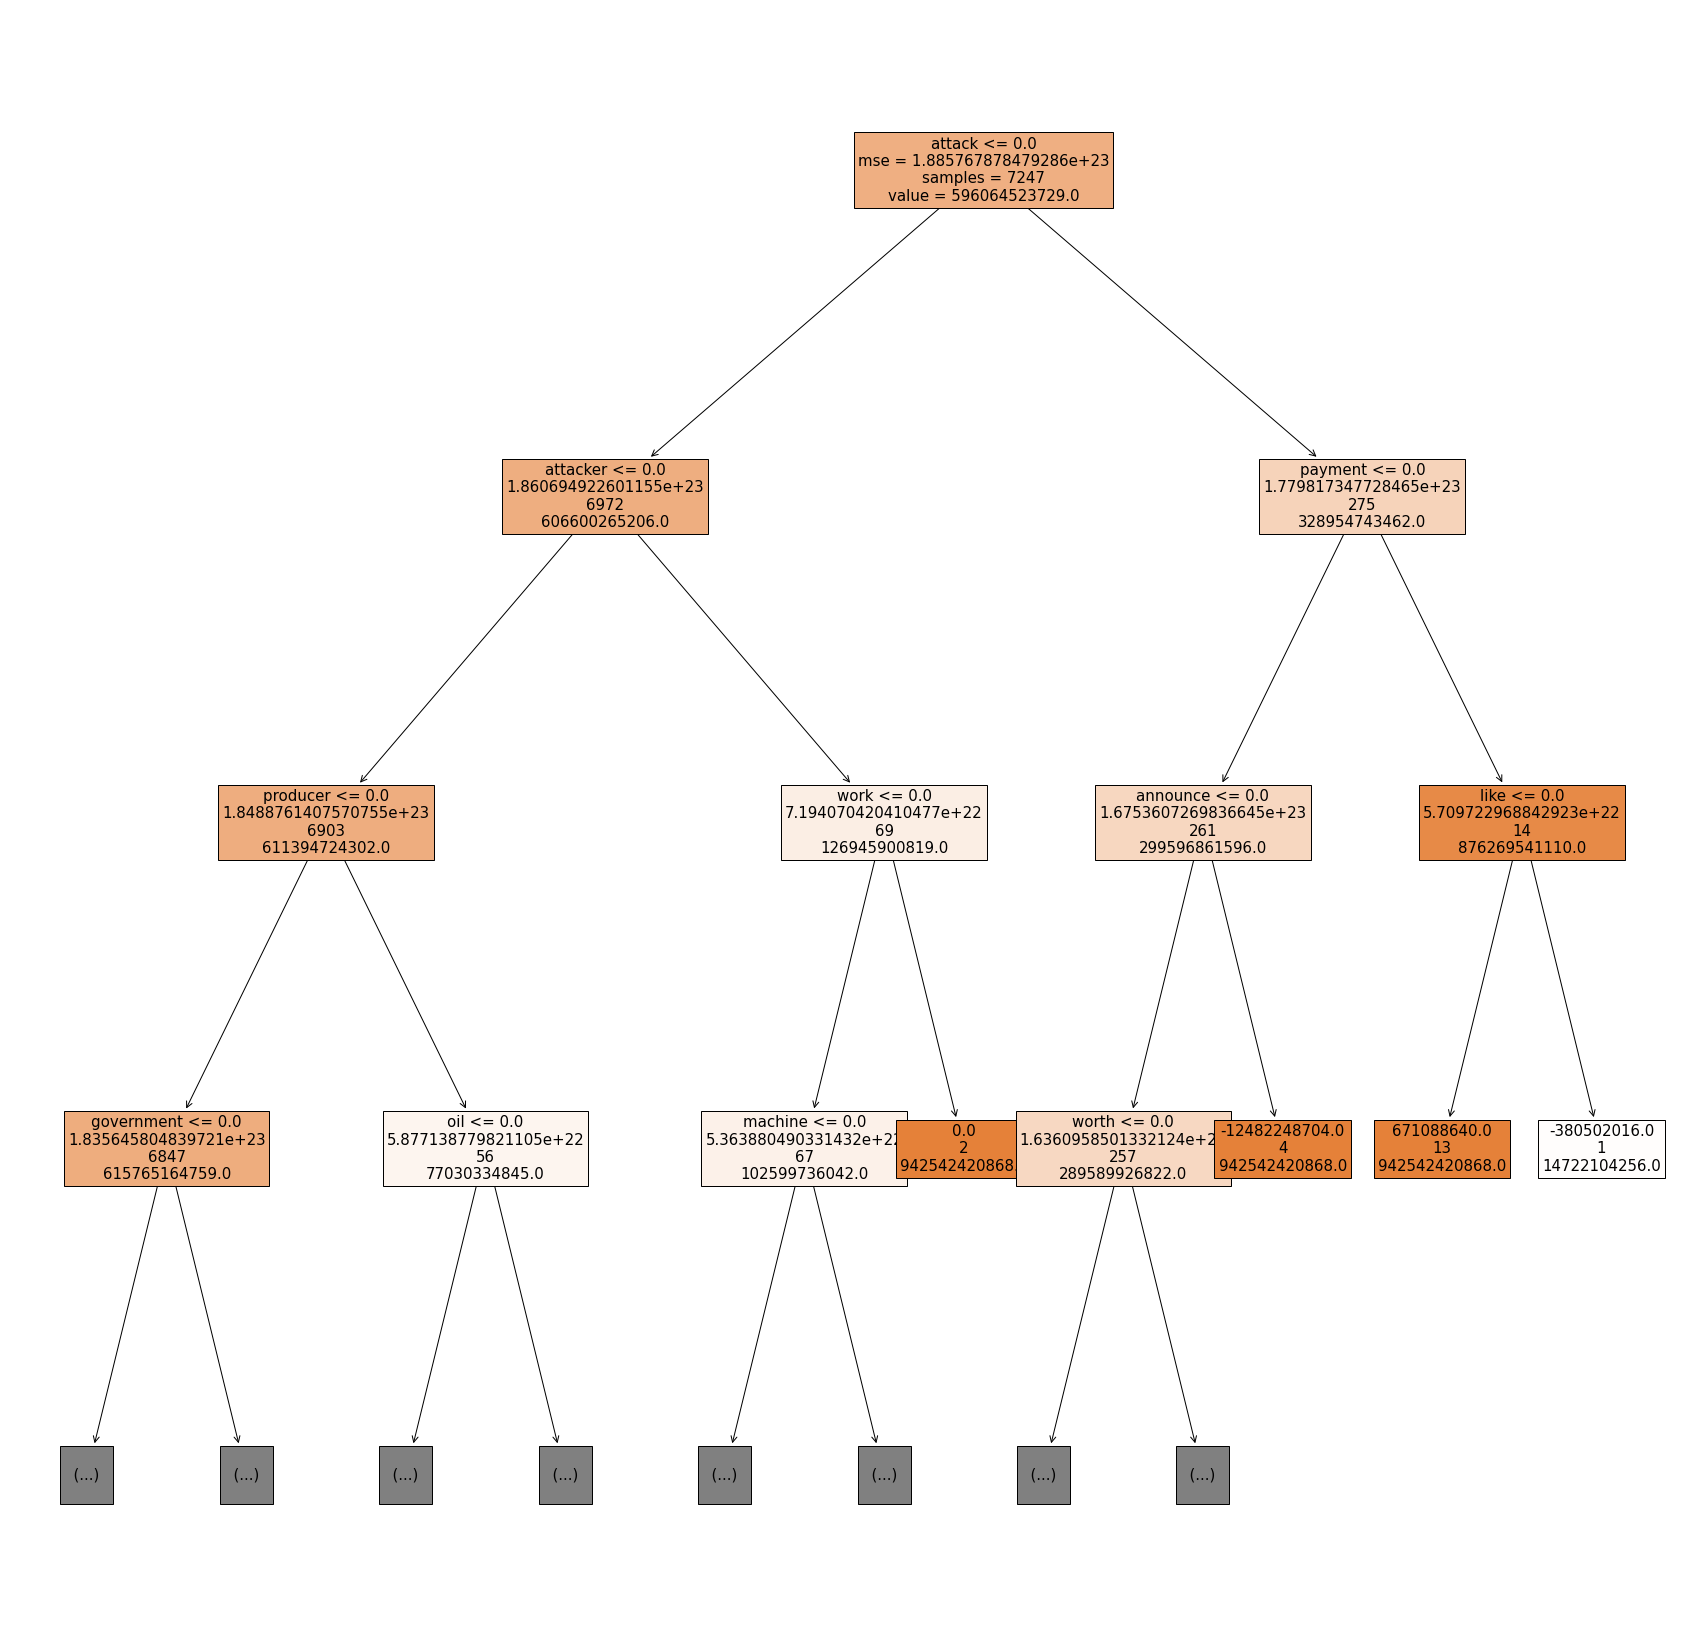

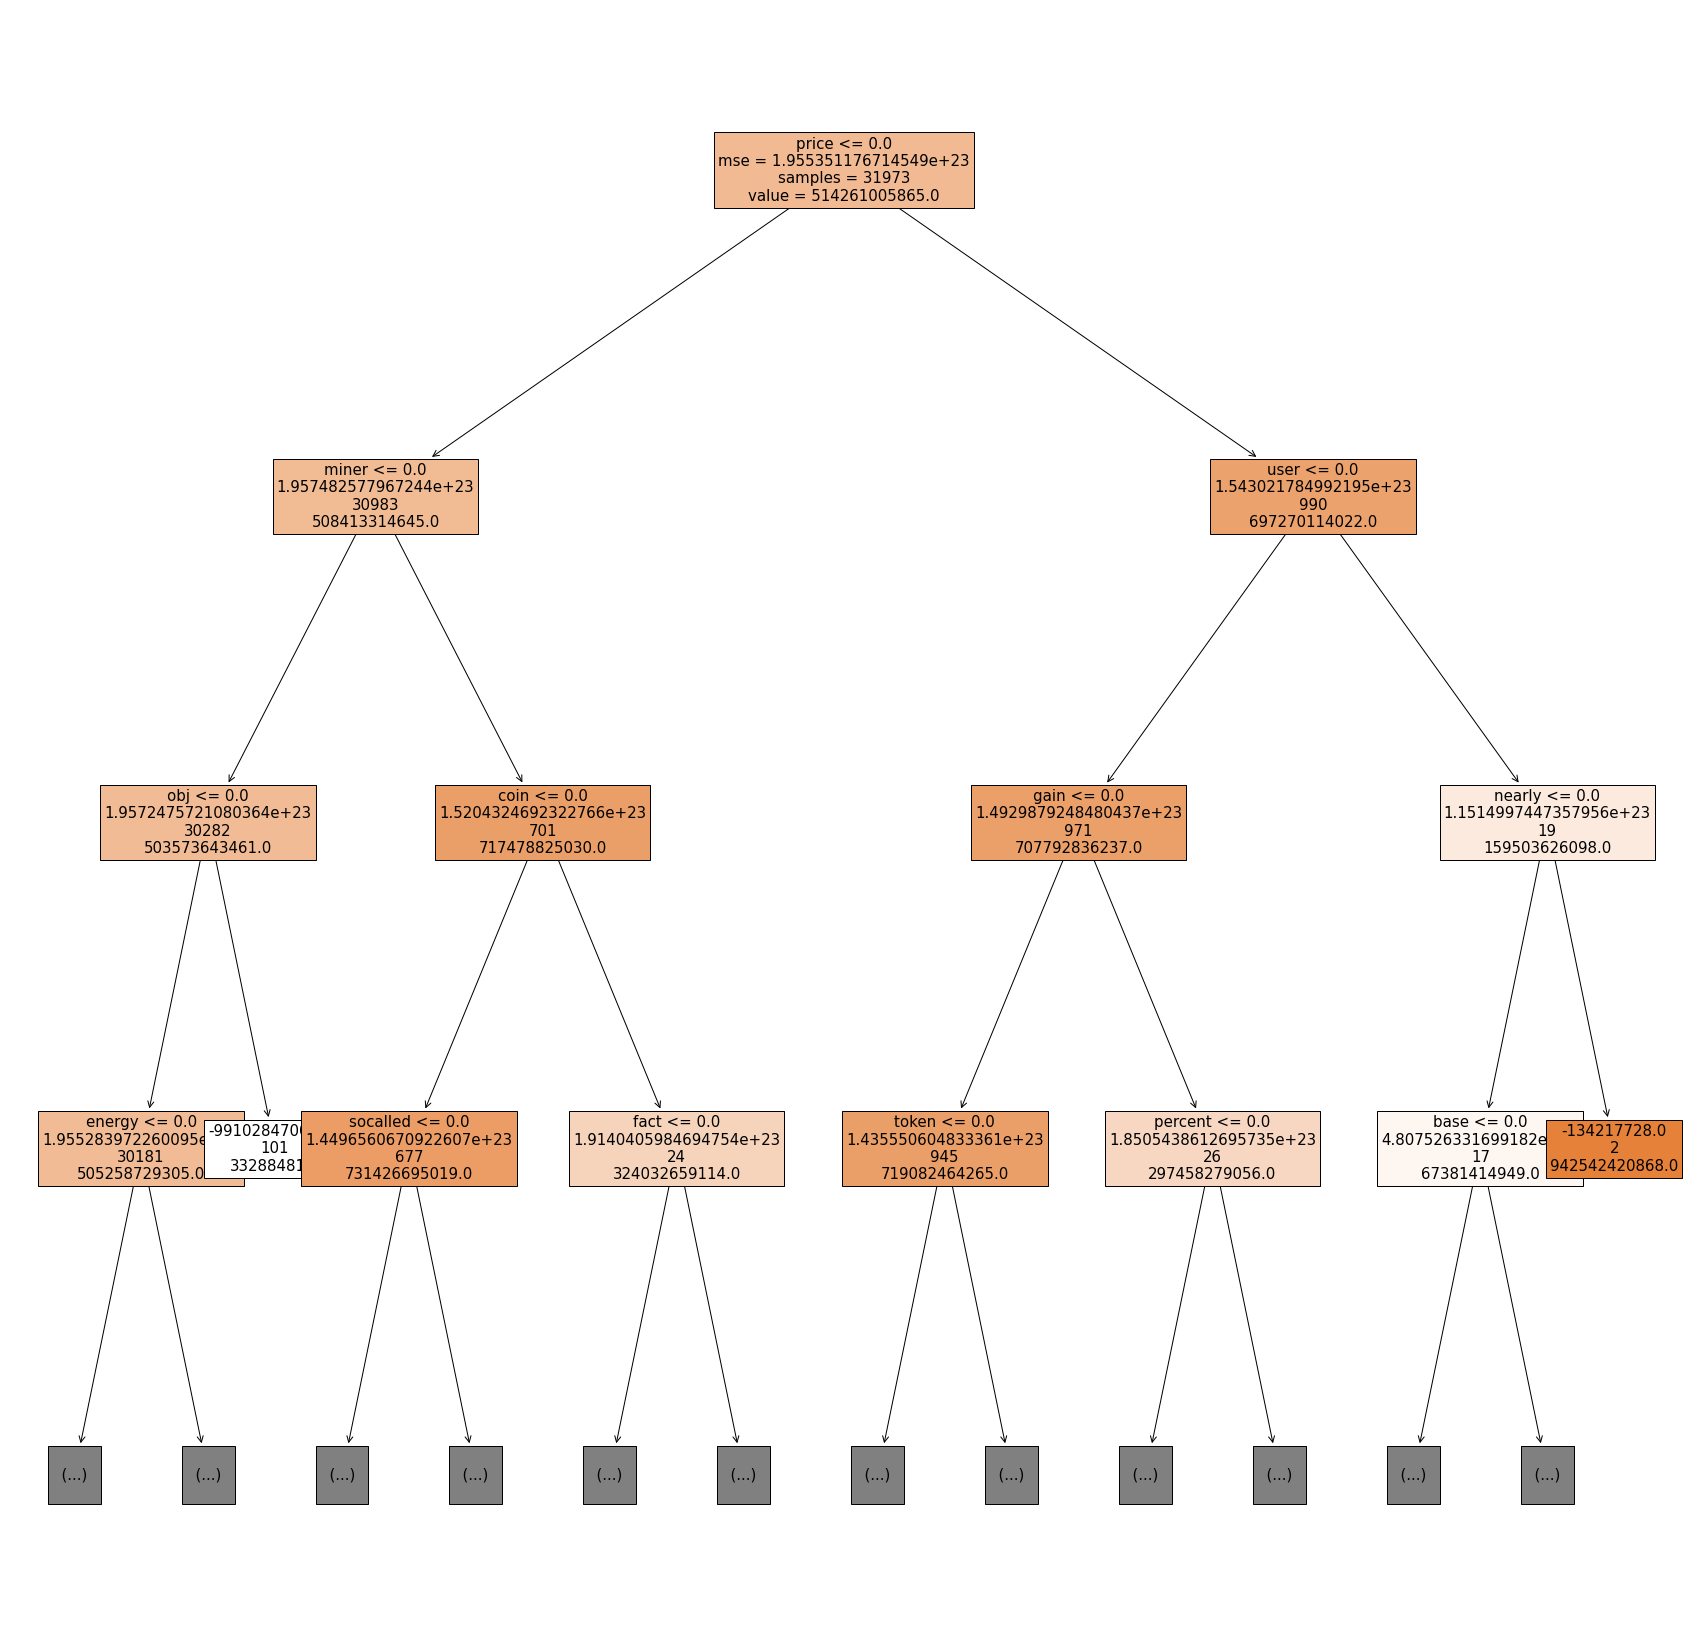

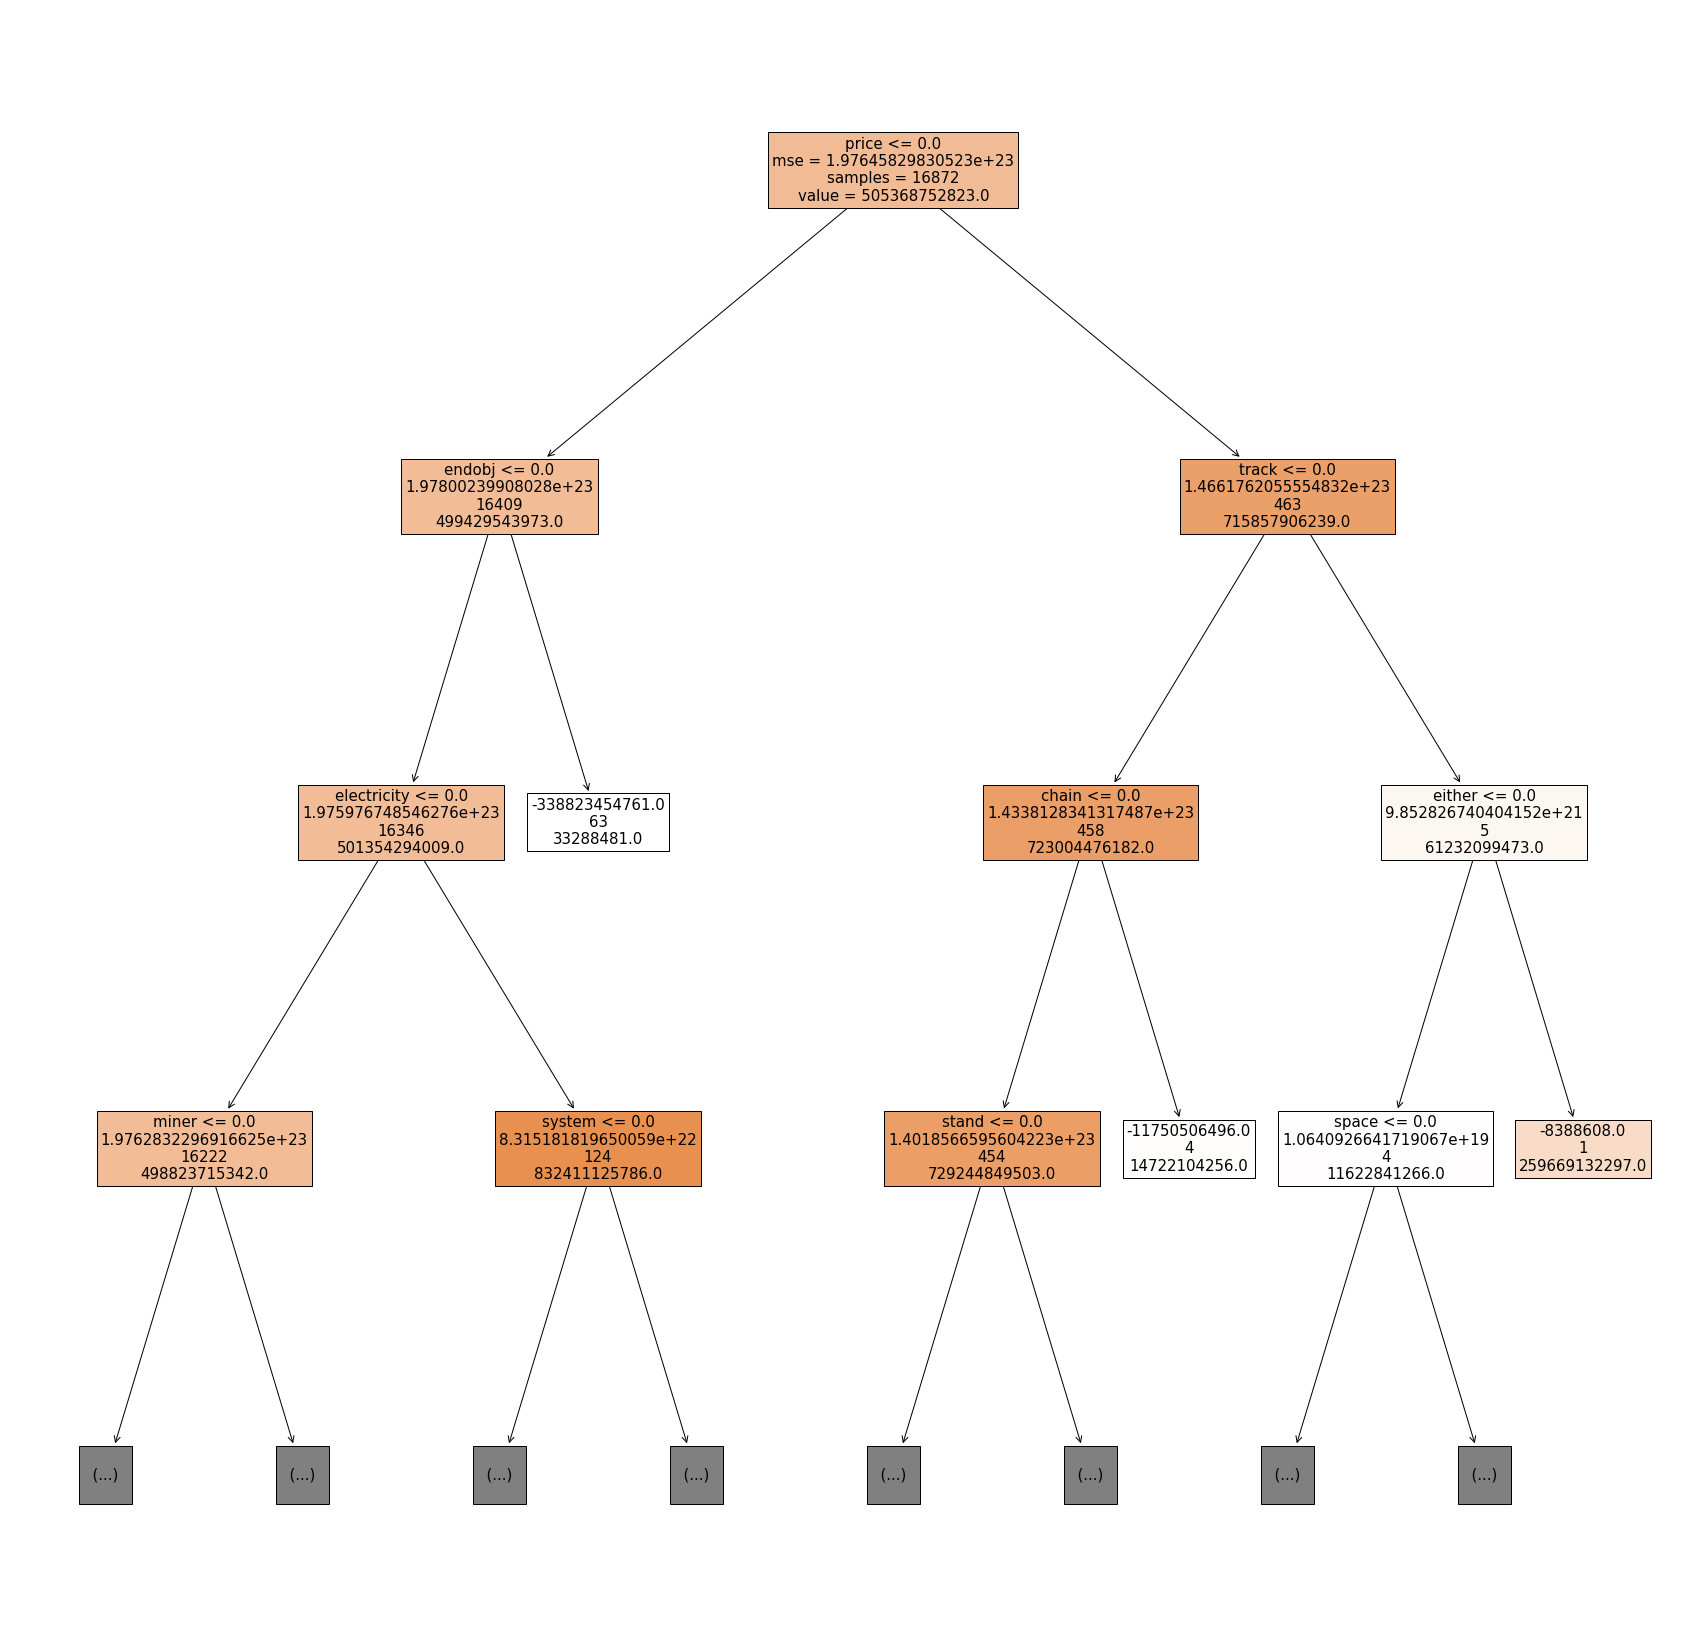

In [45]:
plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_neg, 
                   feature_names=vectorizer_neg.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   label='root')

plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_pos, 
                   feature_names=vectorizer_pos.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   label='root')

plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_neu, 
                   feature_names=vectorizer_neu.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   label='root')

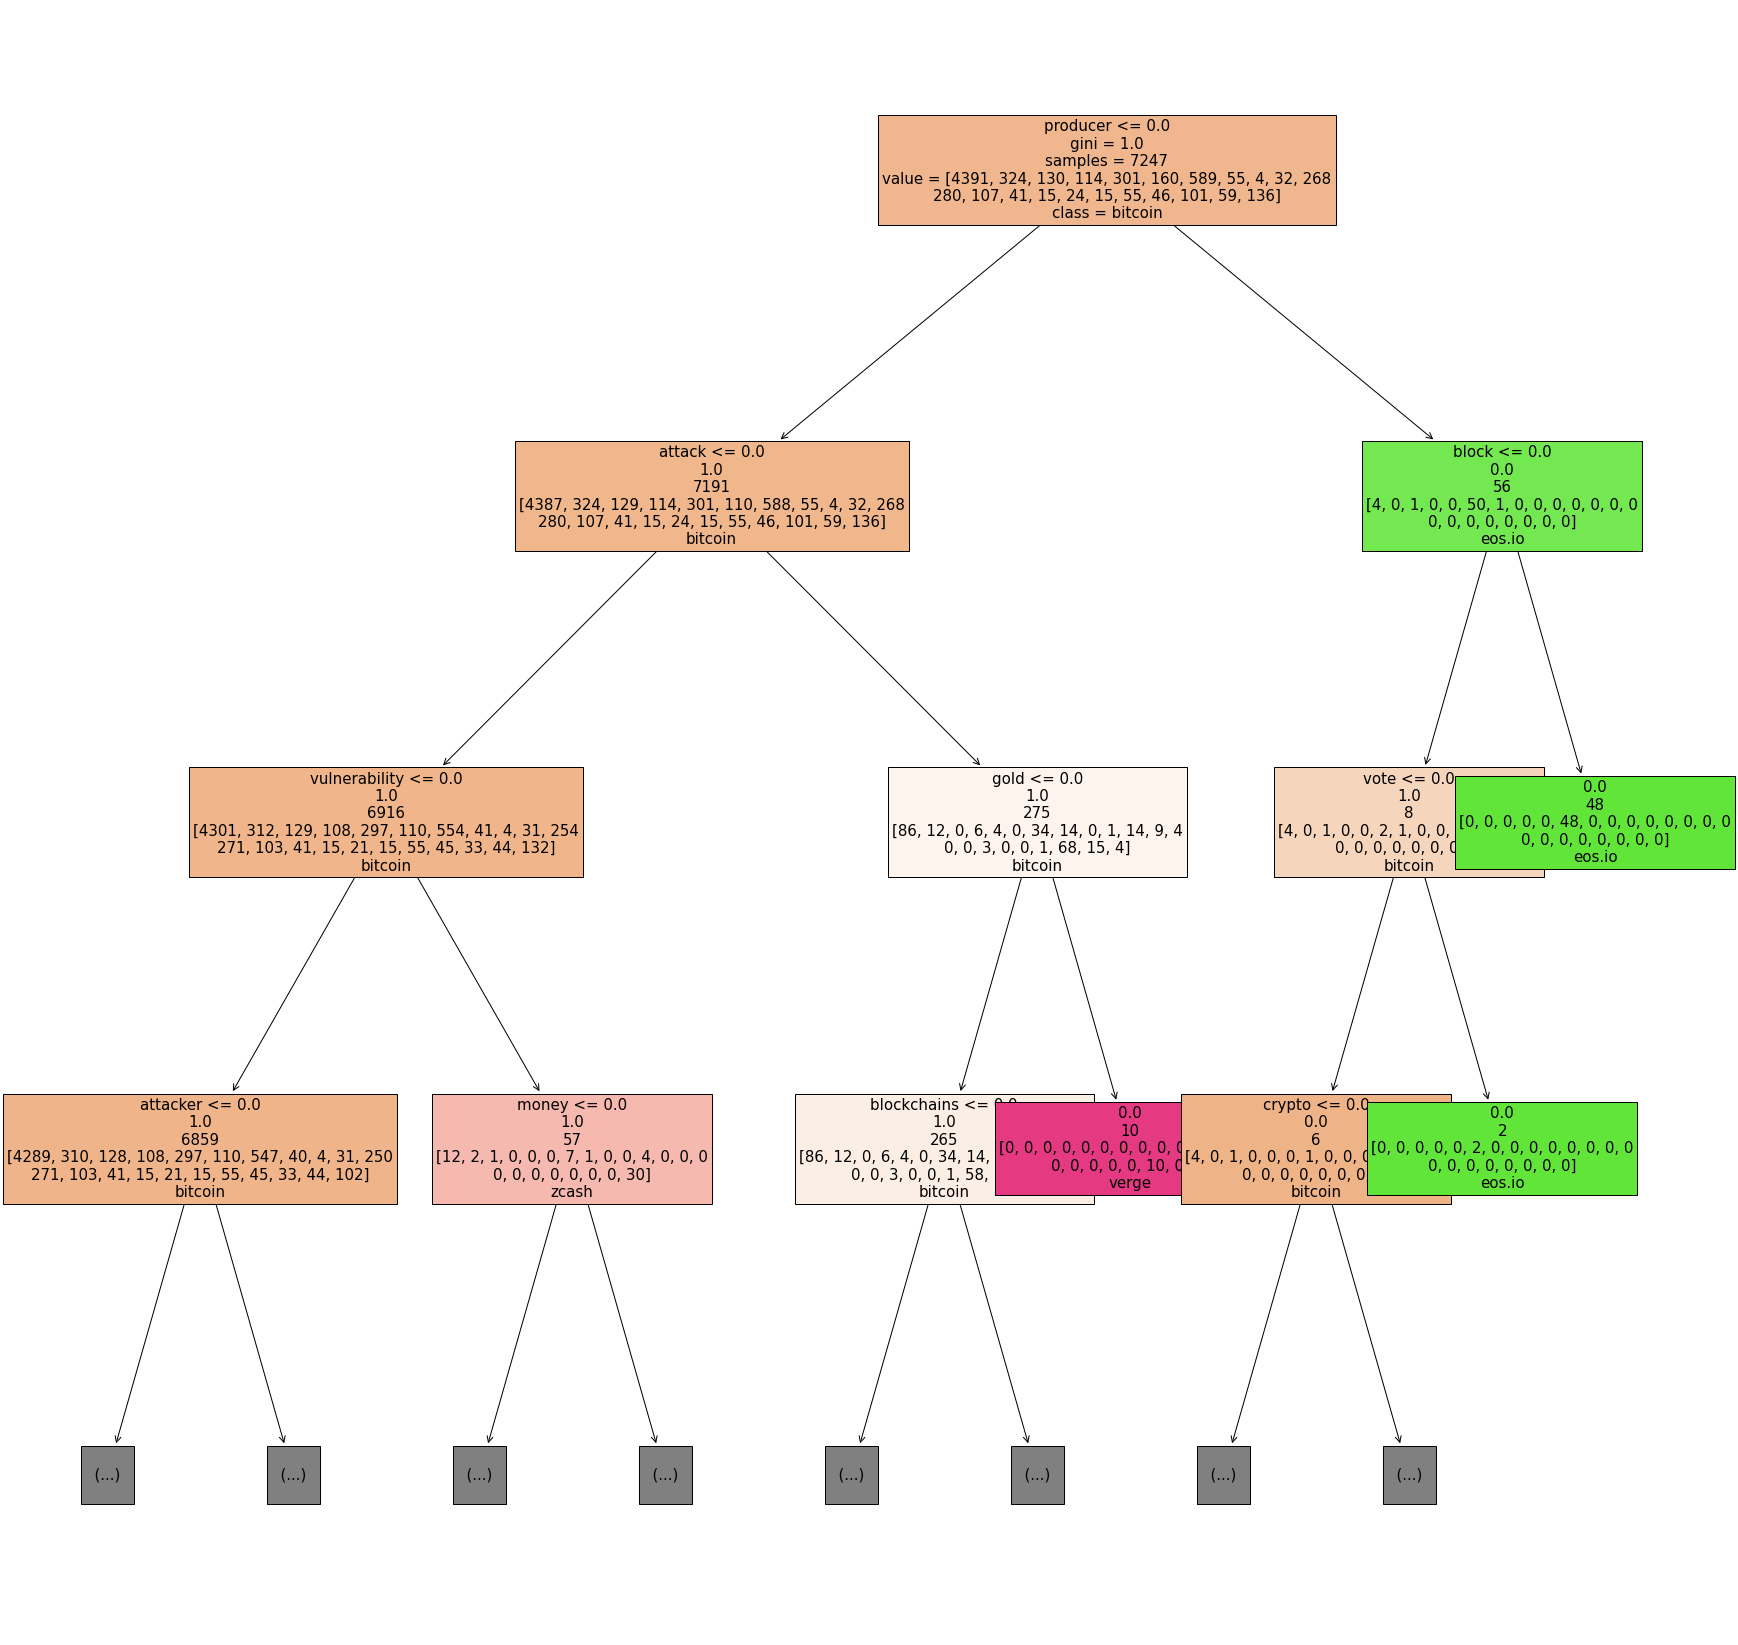

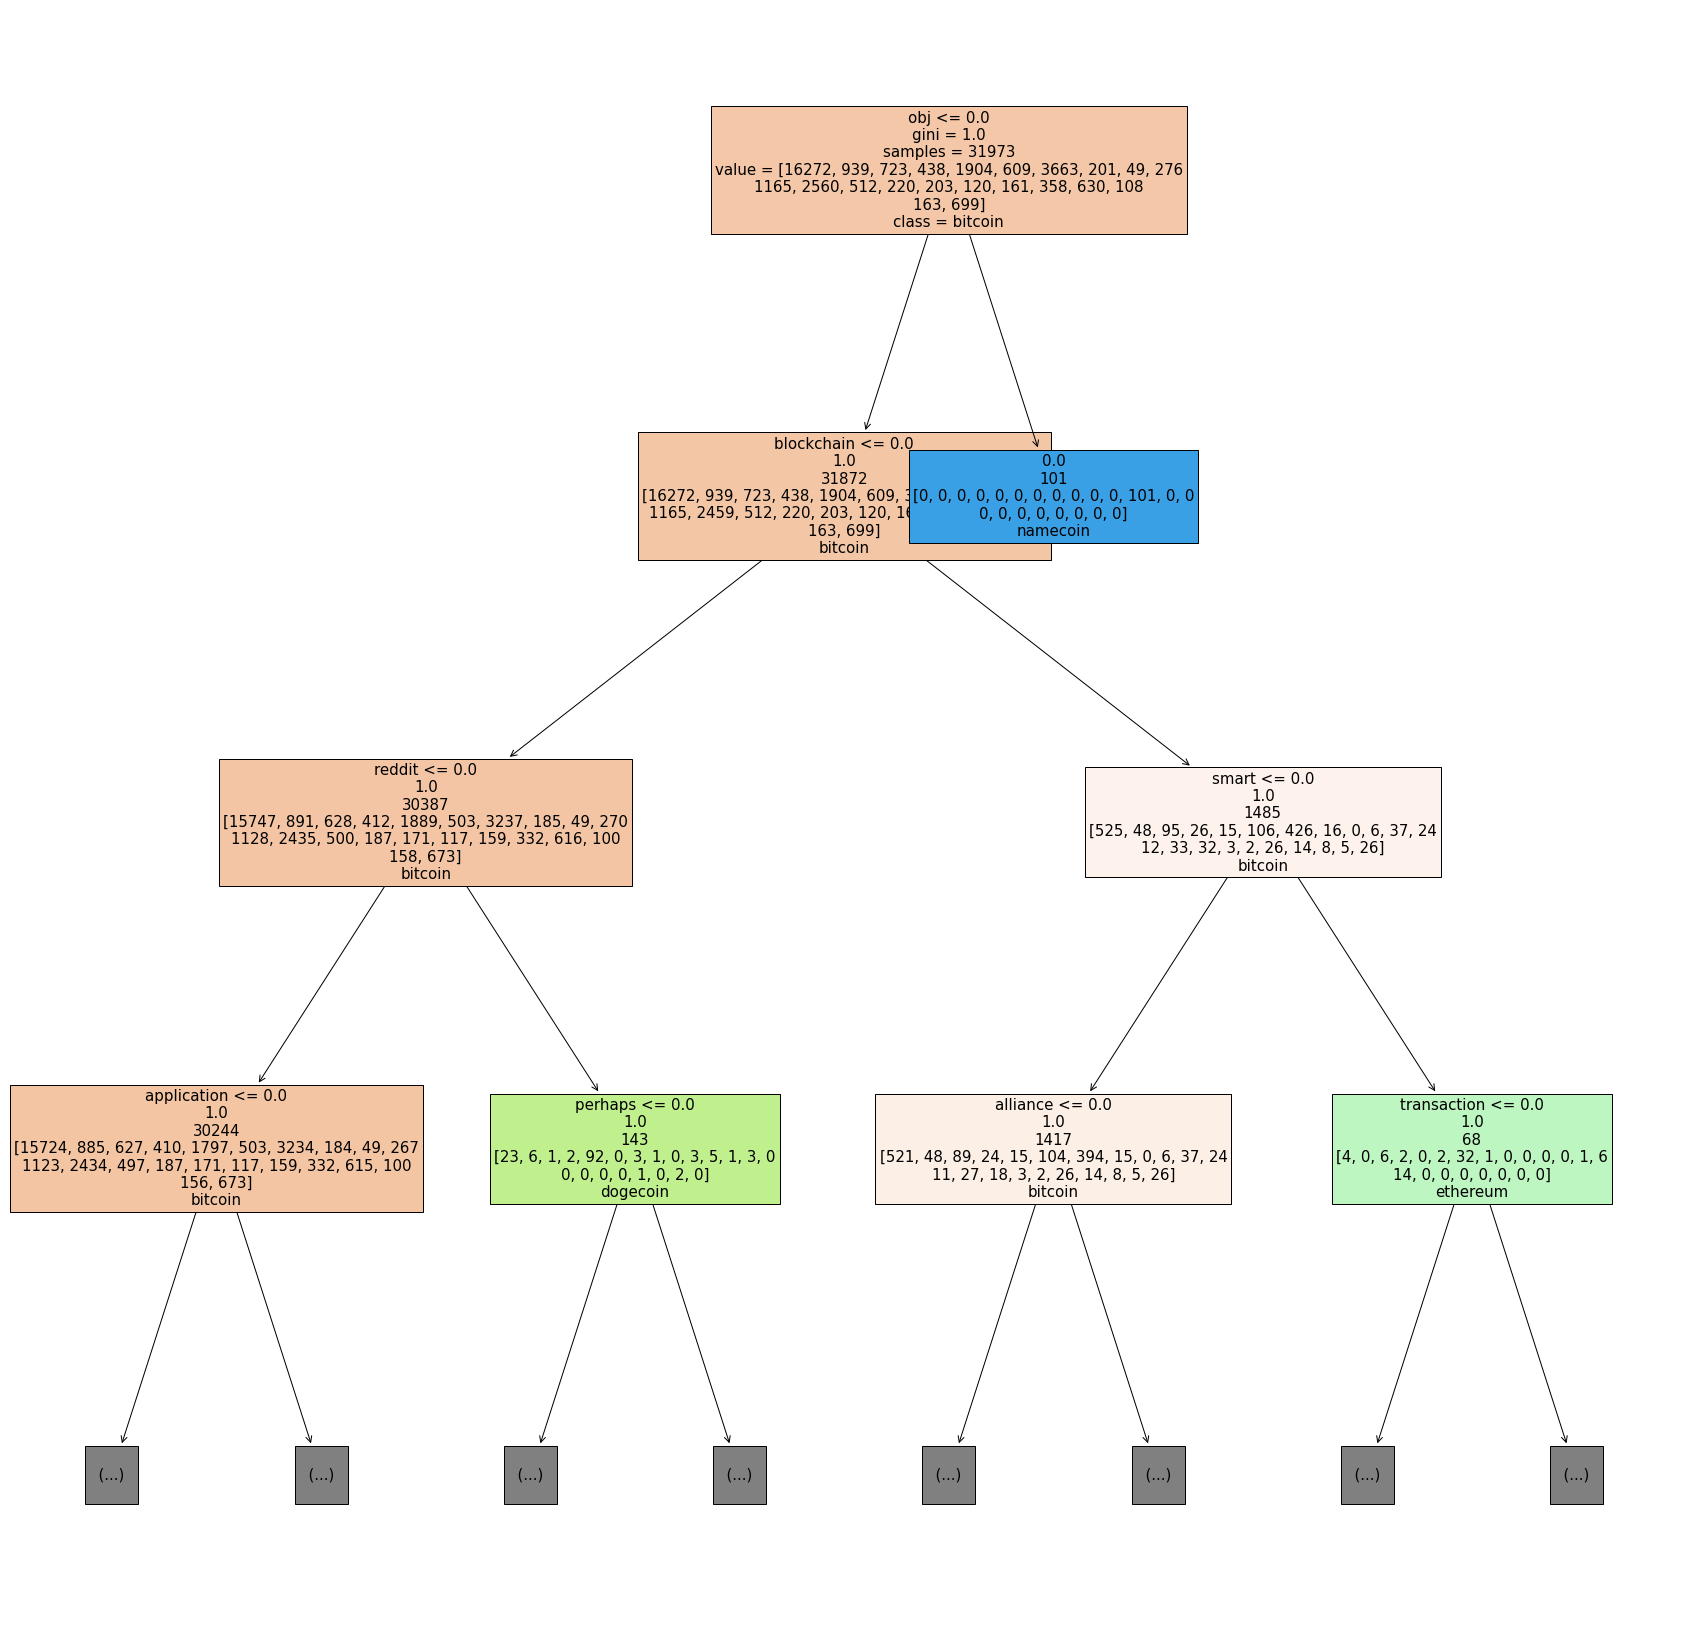

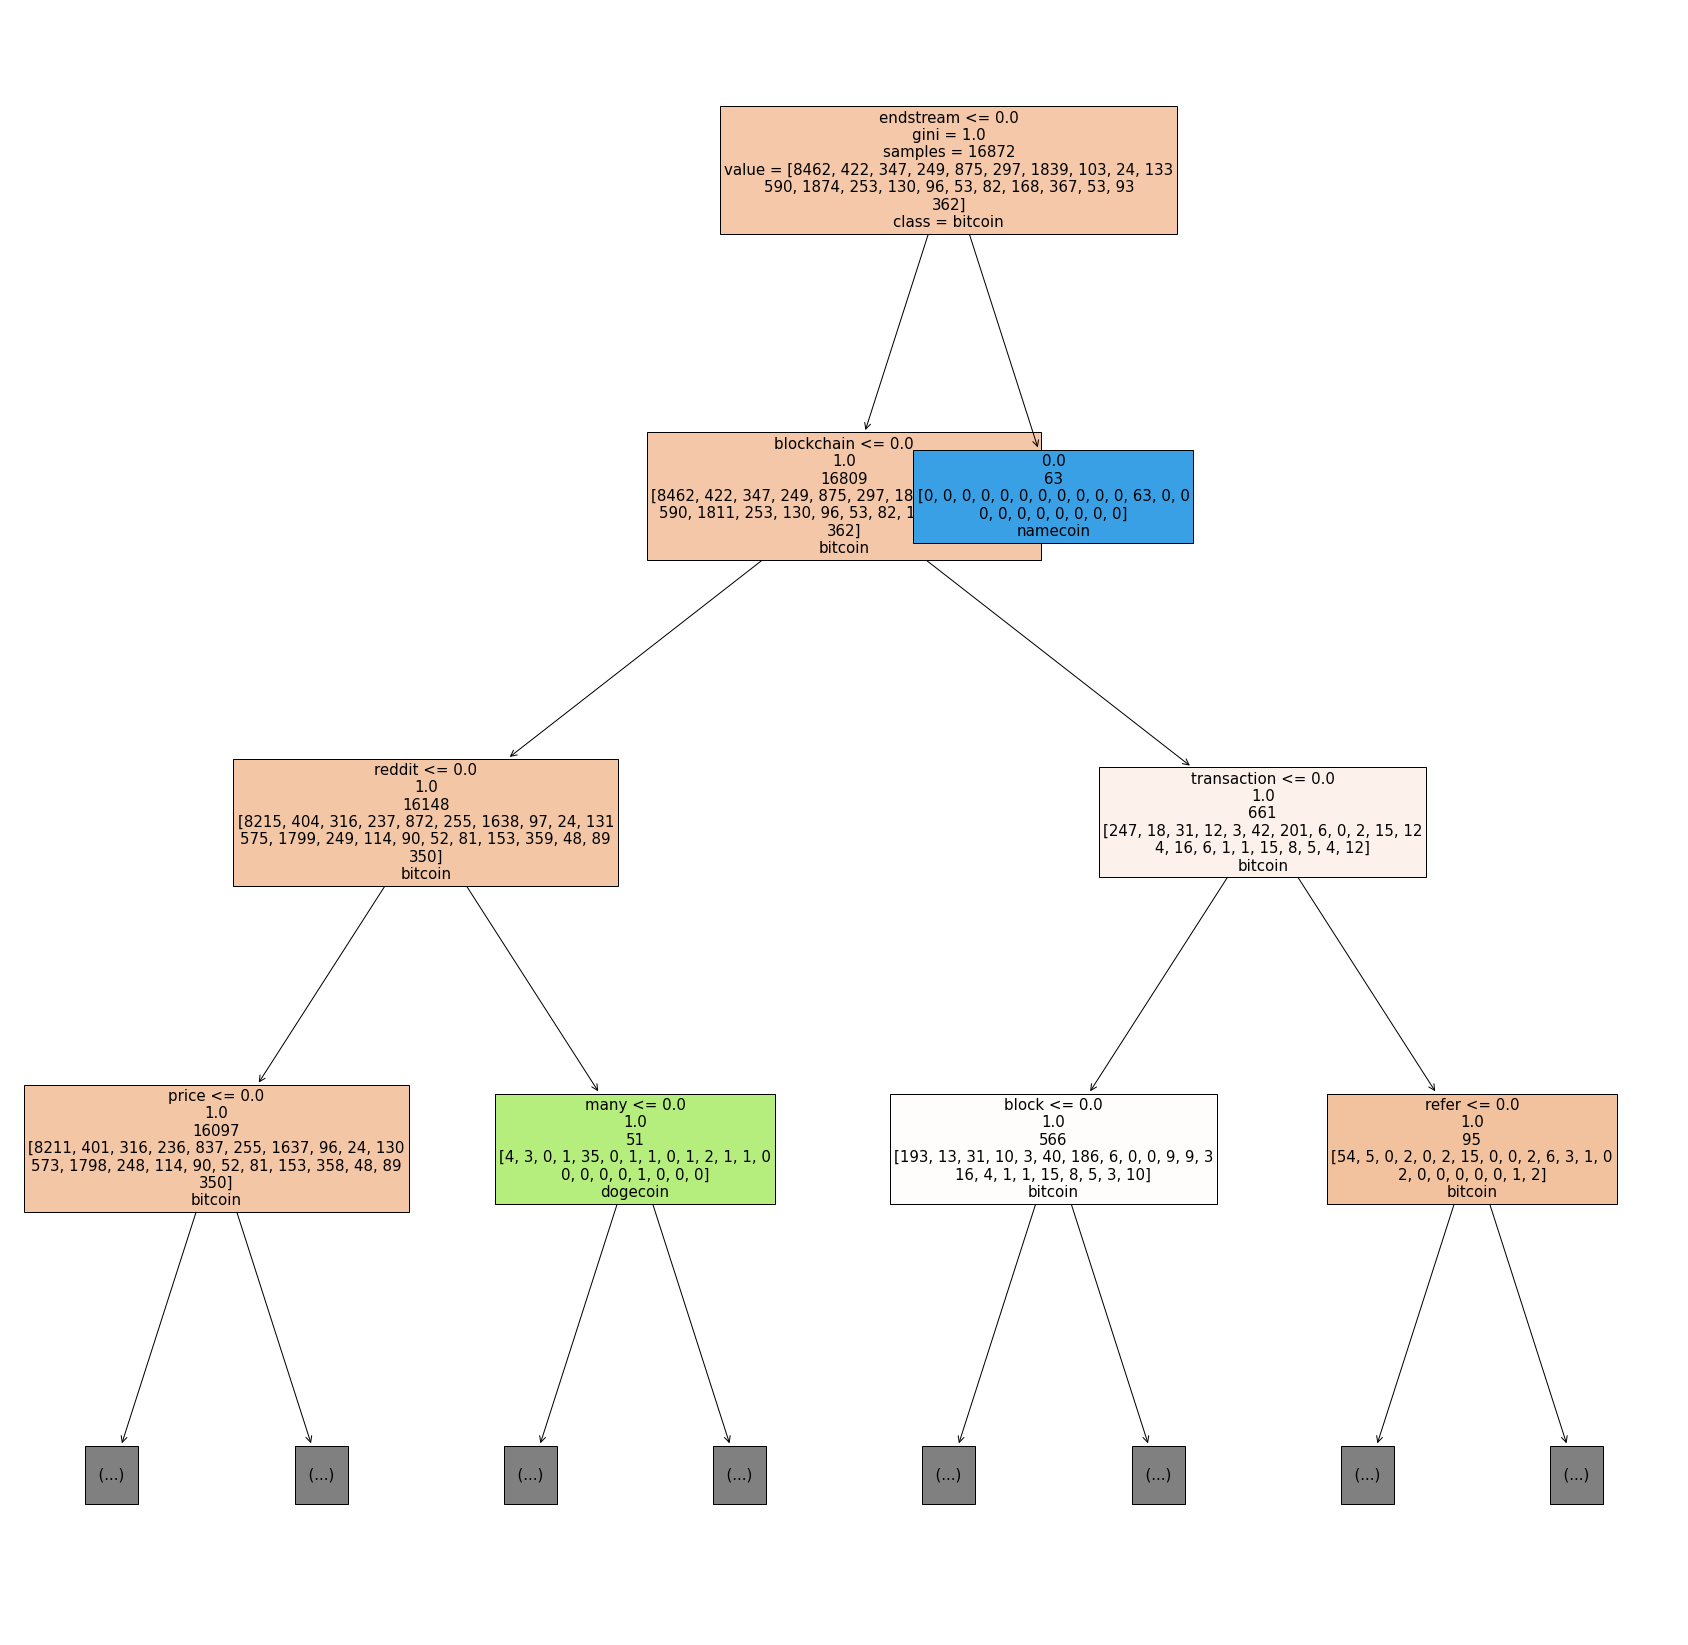

In [46]:

plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_class_neg, 
                   feature_names=vectorizer_neg.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   class_names=dt_class_neg.classes_,
                   label='root')


plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_class_pos, 
                   feature_names=vectorizer_pos.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   class_names=dt_class_pos.classes_,
                   label='root')

plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_class_neu, 
                   feature_names=vectorizer_neu.get_feature_names(), 
                   filled=True, max_depth=3, fontsize=15, precision=0,
                   class_names=dt_class_neu.classes_,
                   label='root')



In [47]:
################################
# summarize feature importance


# accepts a random forest model and list of feature names
# and returns a dataframe coontaining featre names and importance
def get_feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame(columns=['feature', 'importance'])
    for i in range(len(importance)):
        feature_importance.loc[len(feature_importance)] = [feature_names[i], importance[i]]
    return feature_importance

#################################
## Get feature importance for each model
regressor_pos_feature_importance = get_feature_importance(dt_pos, vectorizer_pos.get_feature_names())
regressor_neg_feature_importance = get_feature_importance(dt_neg, vectorizer_neg.get_feature_names())
regressor_neu_feature_importance = get_feature_importance(dt_neu, vectorizer_neu.get_feature_names())

classifier_pos_feature_importance = get_feature_importance(dt_class_pos, vectorizer_pos.get_feature_names())
classifier_neg_feature_importance = get_feature_importance(dt_class_neg, vectorizer_neg.get_feature_names())
classifier_neu_feature_importance = get_feature_importance(dt_class_neu, vectorizer_neu.get_feature_names())

print("Random Forest Regressor for Features from Positive Comments")
print("Feature Importance:")
print(regressor_pos_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Regressor for Features from Negative Comments")
print("Feature Importance:")
print(regressor_neg_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Regressor for Features from Neutral Comments")
print("Feature Importance:")
print(regressor_neu_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Classifier for Features from Positive Comments")
print("Feature Importance:")
print(classifier_pos_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Classifier for Features from Negative Comments")
print("Feature Importance:")
print(classifier_neg_feature_importance.sort_values(by=['importance'], ascending=False).head(15))
print("######################")
print("")
print("Random Forest Classifier for Features from Neutral Comments")
print("Feature Importance:")
print(classifier_neu_feature_importance.sort_values(by=['importance'], ascending=False).head(15))

Random Forest Regressor for Features from Positive Comments
Feature Importance:
         feature  importance
686        price    0.065909
565        miner    0.060459
603          obj    0.049493
297       energy    0.047438
913        token    0.045107
287  electricity    0.042397
400   government    0.041719
832        smart    0.035347
346      feature    0.032839
677        power    0.030490
893         team    0.030484
740       reddit    0.029687
397         gold    0.029665
709     protocol    0.028314
358       fincen    0.025289
######################

Random Forest Regressor for Features from Negative Comments
Feature Importance:
           feature  importance
60          attack    0.082749
691       producer    0.065411
61        attacker    0.065054
394     government    0.053032
98      blockchain    0.037033
75            bank    0.036530
435        illegal    0.036315
347            fee    0.029497
961  vulnerability    0.029028
731         reddit    0.022827
153       c

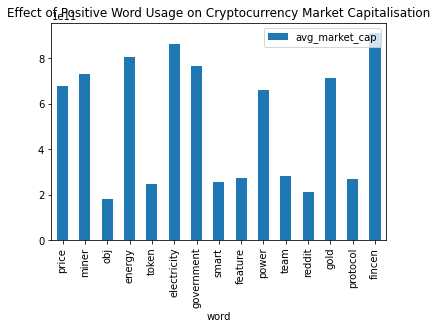

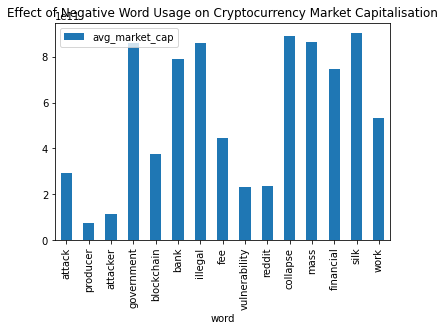

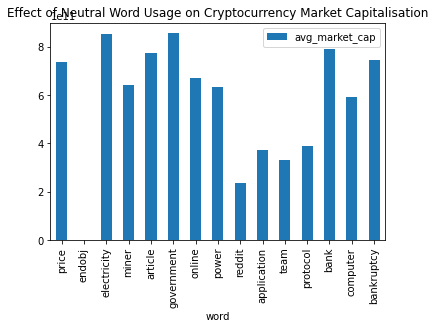

In [48]:
################################################
##  Get average market cap of coins 
##  With common words in varous sentiment scores
##  To ascetrain relationship between online references
##  and eventual cryptocurrency market cap

## Create data frames for words found in positive, negitive and neutral comments

effect_of_positive = pd.DataFrame(columns=['word','avg_market_cap'])
effect_of_negative = pd.DataFrame(columns=['word','avg_market_cap'])
effect_of_neutral = pd.DataFrame(columns=['word','avg_market_cap'])

top_15_positive_features = regressor_pos_feature_importance.sort_values(by=['importance'], ascending=False).head(15)
top_15_negative_features = regressor_neg_feature_importance.sort_values(by=['importance'], ascending=False).head(15)
top_15_neutral_features = regressor_neu_feature_importance.sort_values(by=['importance'], ascending=False).head(15)


for index, row in top_15_positive_features.iterrows():
    avg_market_cap = final_sentence_corpus.market_cap[(final_sentence_corpus['sentence'].str.contains(row['feature'])) 
                                                      & (final_sentence_corpus['compound']>0.15)].mean()
    effect_of_positive.loc[len(effect_of_positive)] = [row['feature'], avg_market_cap]
 
effect_of_positive.plot.bar(x='word', y='avg_market_cap', title="Effect of Positive Word Usage on Cryptocurrency Market Capitalisation");


for index, row in top_15_negative_features.iterrows():
    avg_market_cap = final_sentence_corpus.market_cap[(final_sentence_corpus['sentence'].str.contains(row['feature'])) 
                                                      & (final_sentence_corpus['compound']<-0.15)].mean()
    effect_of_negative.loc[len(effect_of_negative)] = [row['feature'], avg_market_cap]
 
effect_of_negative.plot.bar(x='word', y='avg_market_cap', title="Effect of Negative Word Usage on Cryptocurrency Market Capitalisation");


for index, row in top_15_neutral_features.iterrows():
    avg_market_cap = final_sentence_corpus.market_cap[(final_sentence_corpus['sentence'].str.contains(row['feature'])) 
                                                      & (final_sentence_corpus['compound']<-0.15)].mean()
    effect_of_neutral.loc[len(effect_of_neutral)] = [row['feature'], avg_market_cap]
 
effect_of_neutral.plot.bar(x='word', y='avg_market_cap', title="Effect of Neutral Word Usage on Cryptocurrency Market Capitalisation");
